# Census Income Project
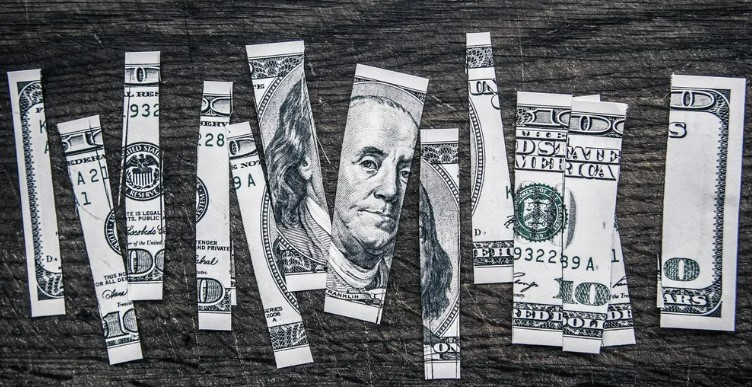
 *                                                                               With Navin Singh

# Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry
Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was
extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) &&
(HRSWK>0)). The prediction task is to determine whether a person makes over $50K a
year. 

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent
estimates of the civilian non-institutional population of the US. These are prepared monthly for
us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so
that by the end we come back to all the controls we used. The term estimate refers to
population totals derived from CPS by creating "weighted tallies" of any specified socioeconomic characteristics of the population. People with similar demographic characteristics
should have similar weights. There is one important caveat to remember about this statement.
That is that since the CPS sample is actually a collection of 51 state samples, each with its own
probability of selection, the statement only applies within state.

* Dataset--> https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv 

* More Information about this Project--> https://github.com/ksingh9398/Internship-Project/blob/main/Third-Phase-Evaluation-Projects--1-.pdf 

In [1]:
# Import Important Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df=pd.read_csv('census_income.csv')

# Descriptive Analysis

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [16]:
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [24]:
df.nunique().to_frame('No of unique values')

,No of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [8]:
df.shape

(32560, 15)

In [10]:
print('Rows : {} Columns: {}'.format(df.shape[0],df.shape[1]))

Rows : 32560 Columns: 15


There are 32560 rows and 15 columns are present with including one output columns (income)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


in this data set we can see that there are diffrent-diff'n data types are present ['object',int64'], and no any null values are present, or Memory usage

In [36]:
# let's chake null values
round((df.isnull().sum()/df.shape[0])*100,2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
dtype: object

<Axes: >

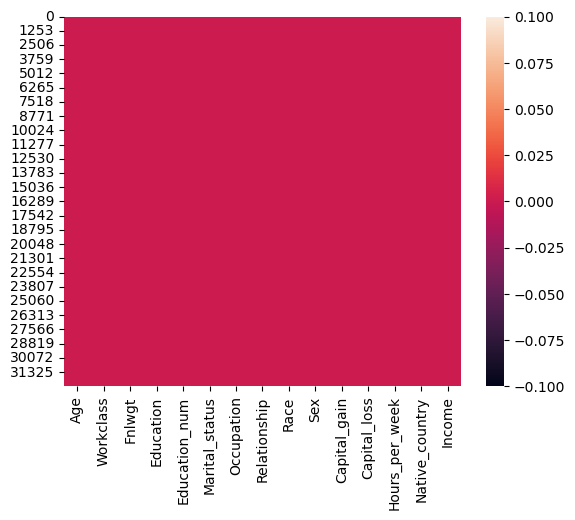

In [15]:
sns.heatmap(df.isnull())

No any null values are present in this dataset

In [28]:
# Statical Summary
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


by describe method we got:
equal count of each column that means no any missing values are in this dataset, 
* in this dataset some columns['Capital_gain',Capital_loss','Hours_per_week] have huege difference between 75% percentile or max values, means outlier are present, and left are small diffrence


In [39]:
# checking the counts of label categories
income=df['Income'].value_counts(normalize=True)
round(income*100,2).astype('str')+ ' %'

Income
 <=50K    75.92 %
 >50K     24.08 %
Name: proportion, dtype: object

# Observation:
* The dataset doesn't have any null values, but it contains missing values,
* The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less thean 50 K and  24.08 % values have income more thean 50 K 

In [60]:
df.head(1)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# Explorratory Data Analysis
# Univariate Analysis

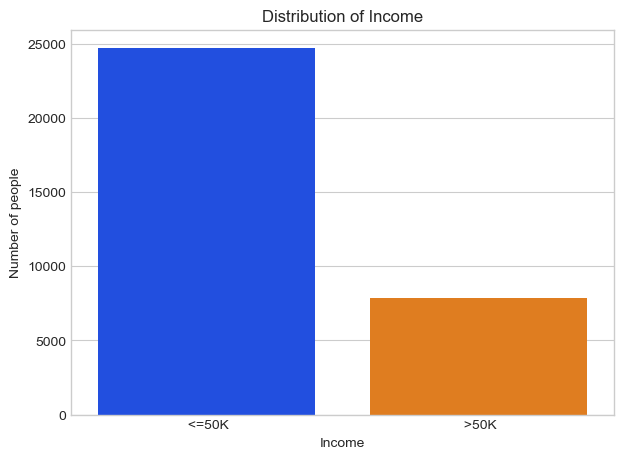

In [90]:
# Creating a b arplot for Income 
income=df['Income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,5))
sns.barplot(x=income.index, y=income.values,palette='bright')
plt.title('Distribution of Income')

plt.xlabel('Income')
plt.ylabel('Number of people')

plt.tick_params(labelsize=10)
plt.show()

<Axes: xlabel='Age', ylabel='Number of People'>

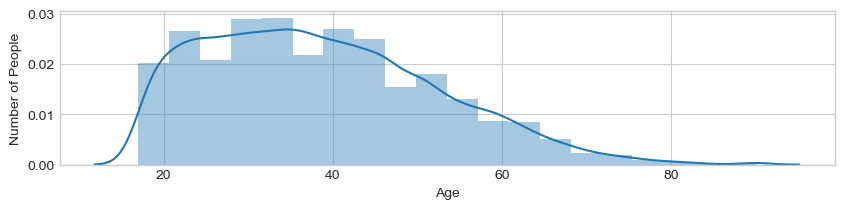

In [56]:
# Creating  adistribution plot for 'Age'
age=df['Age'].value_counts()
plt.figure(figsize=(10,2))
plt.xlabel('Age')
plt.ylabel('Number of People')
sns.distplot(x=df['Age'],bins=20)

<Axes: title={'center': 'Distribution of Education'}, xlabel='Number of People', ylabel='Education'>

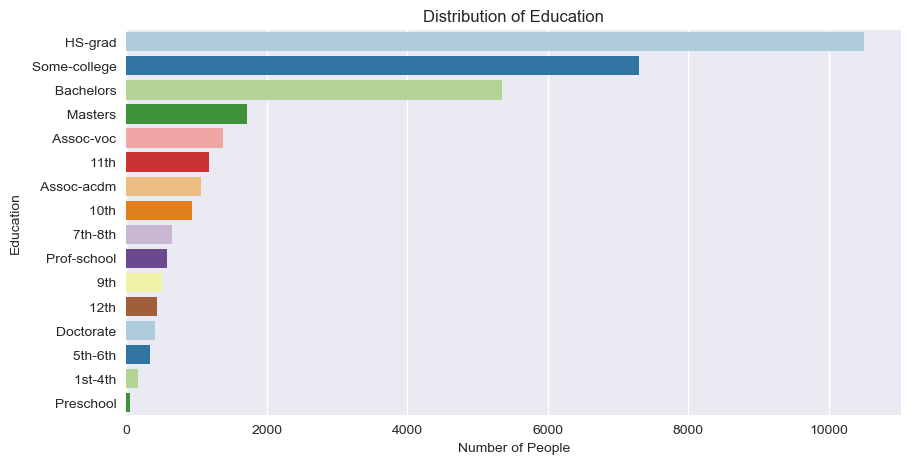

In [61]:
# Creating a barplot for Education 
edu=df['Education'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.title('Distribution of Education')
plt.xlabel('Number of People')
plt.ylabel('Education')
sns.barplot(x=edu.values,y=edu.index,palette='Paired')

<Axes: title={'center': 'Distribution of Education'}, xlabel='Number of People', ylabel='Education_num'>

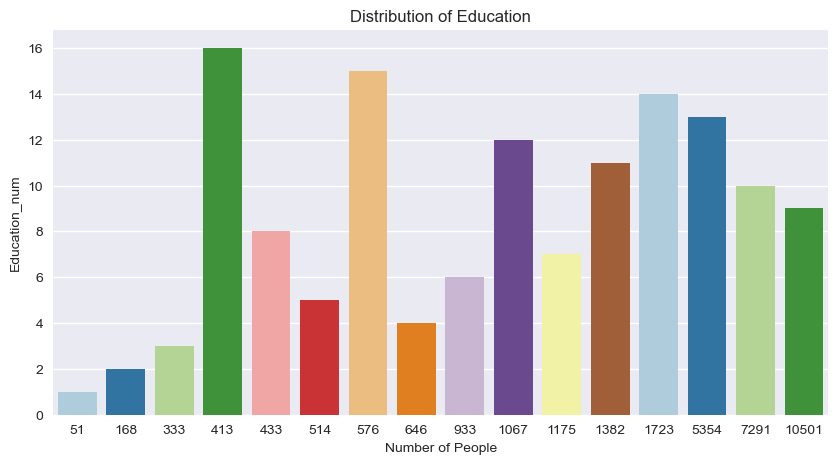

In [62]:
# Creating a barplot for Education_num 
edu=df['Education_num'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.title('Distribution of Education')
plt.xlabel('Number of People')
plt.ylabel('Education')
sns.barplot(x=edu.values,y=edu.index,palette='Paired')

In [67]:
df.head(1)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


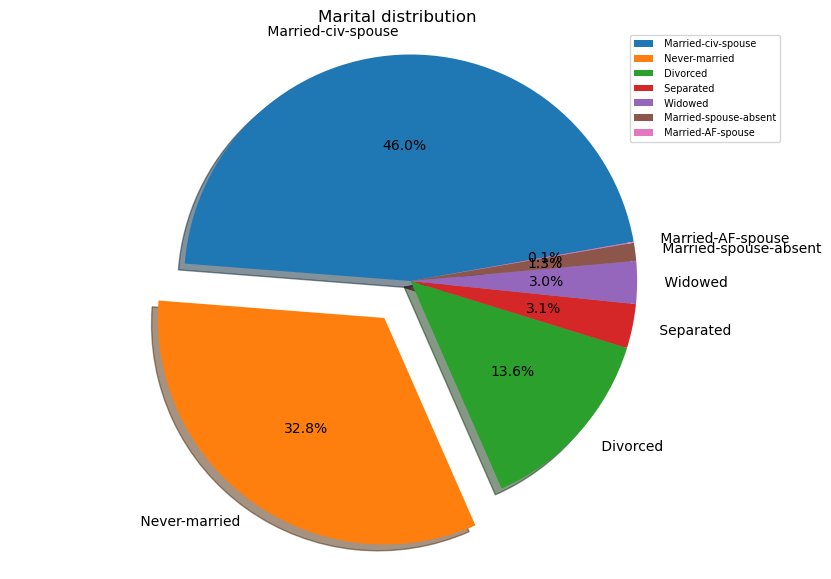

In [89]:
# Creating a pie chart for 'Marital status'
marital = df['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

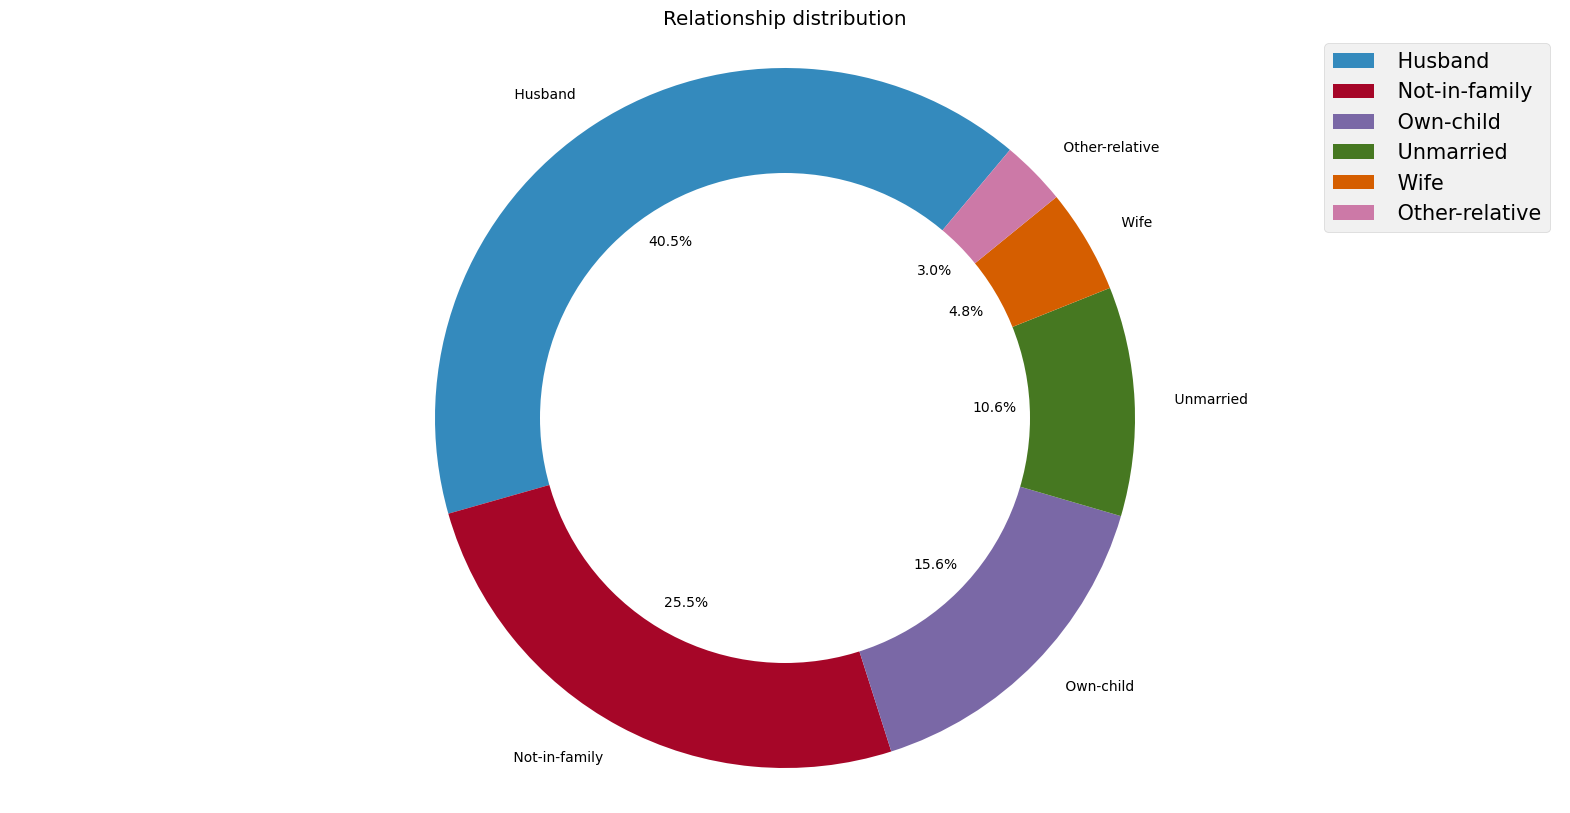

In [88]:
# Creating a donut chart for 'Age'
relation = df['Relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution')
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

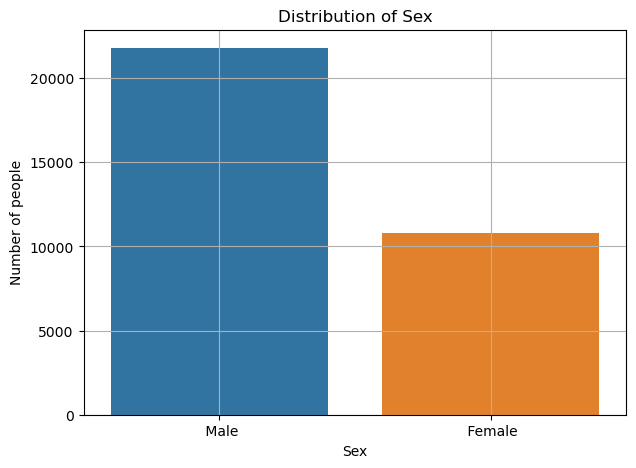

In [87]:
# Creating a barplot for 'Sex'
sex = df['Sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(x=sex.index, y=sex.values)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

In [78]:
!pip install squarify

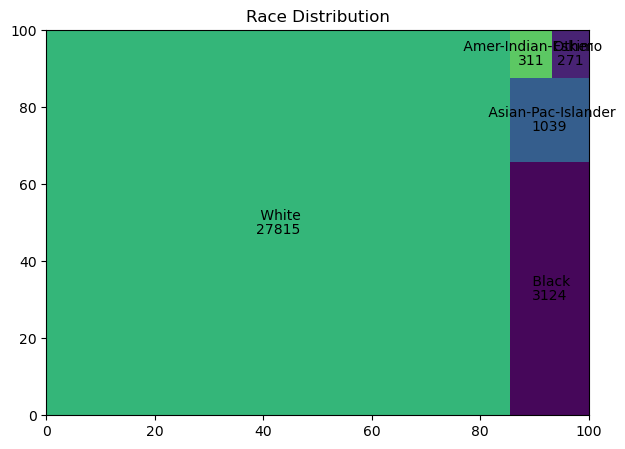

In [82]:
# Creating a Treemap for 'Race'
import squarify
race = df['Race'].value_counts()
plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race Distribution')
plt.show()

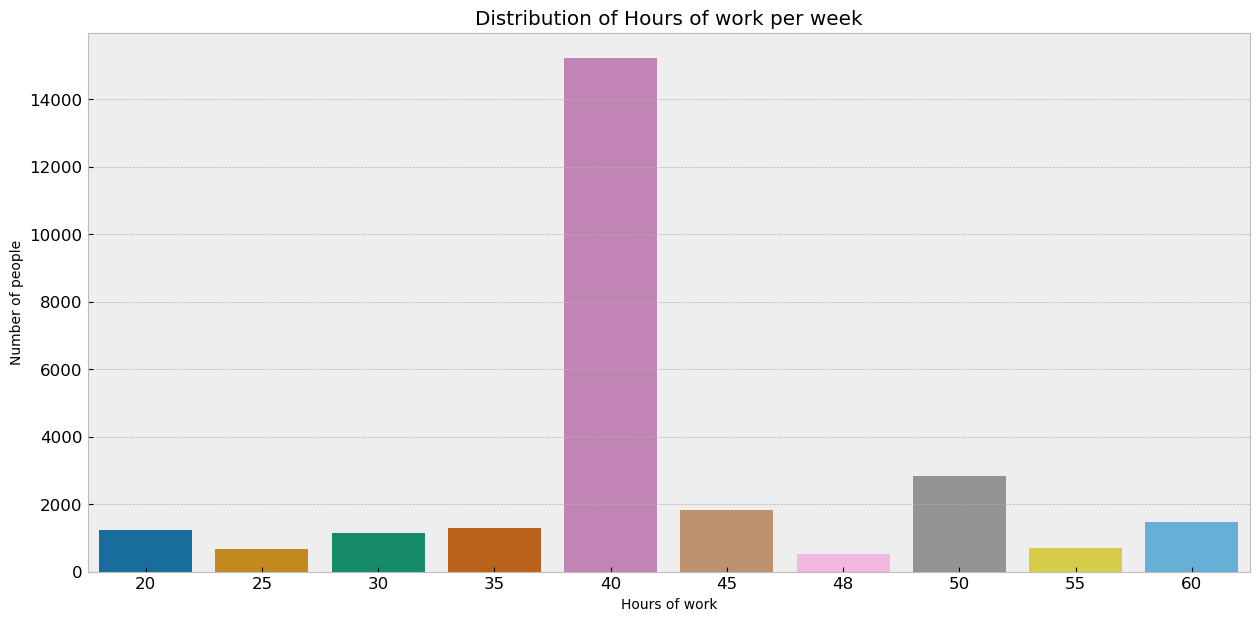

In [86]:
# Creating a barplot for 'Hours per week'
hours = df['Hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(x=hours.index, y=hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week')
plt.xlabel('Hours of work')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.show()

# Bivariate Analysis

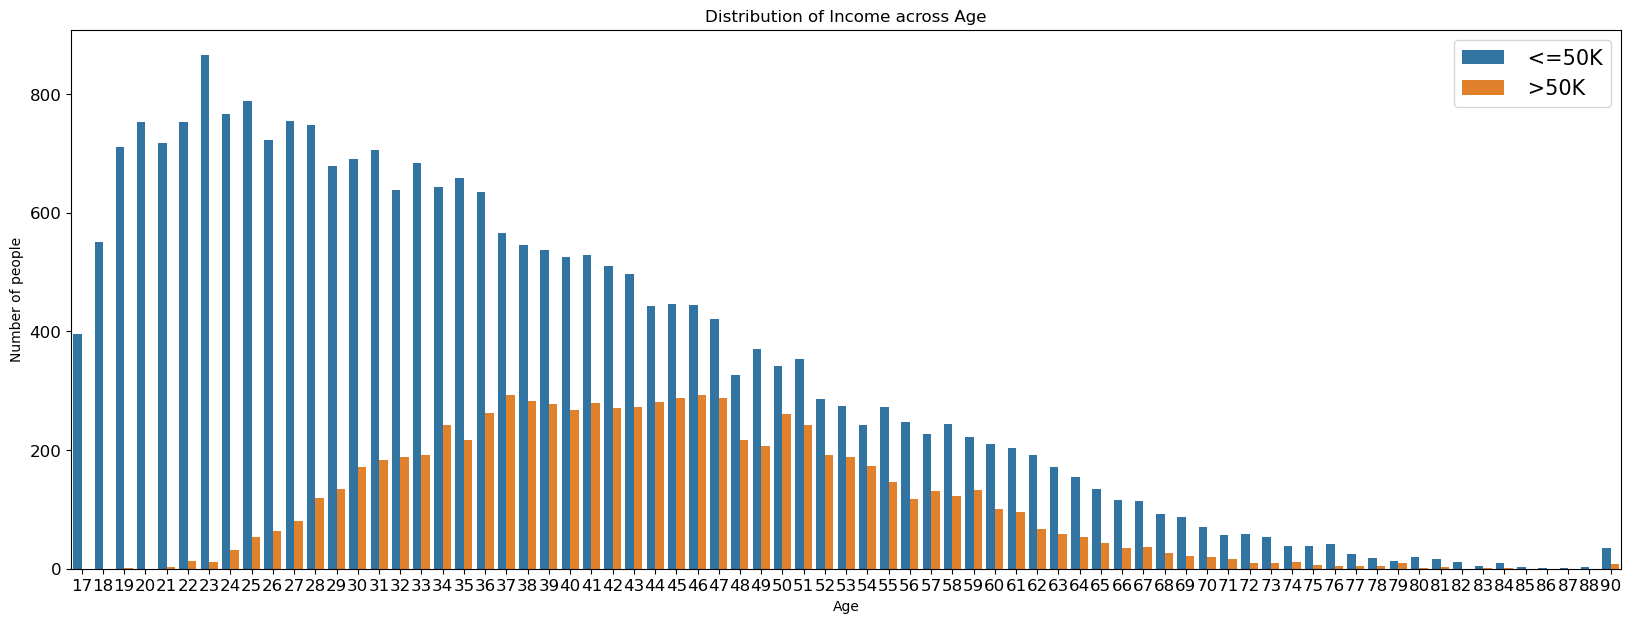

In [103]:
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['Age'], hue=df['Income'])
plt.title('Distribution of Income across Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

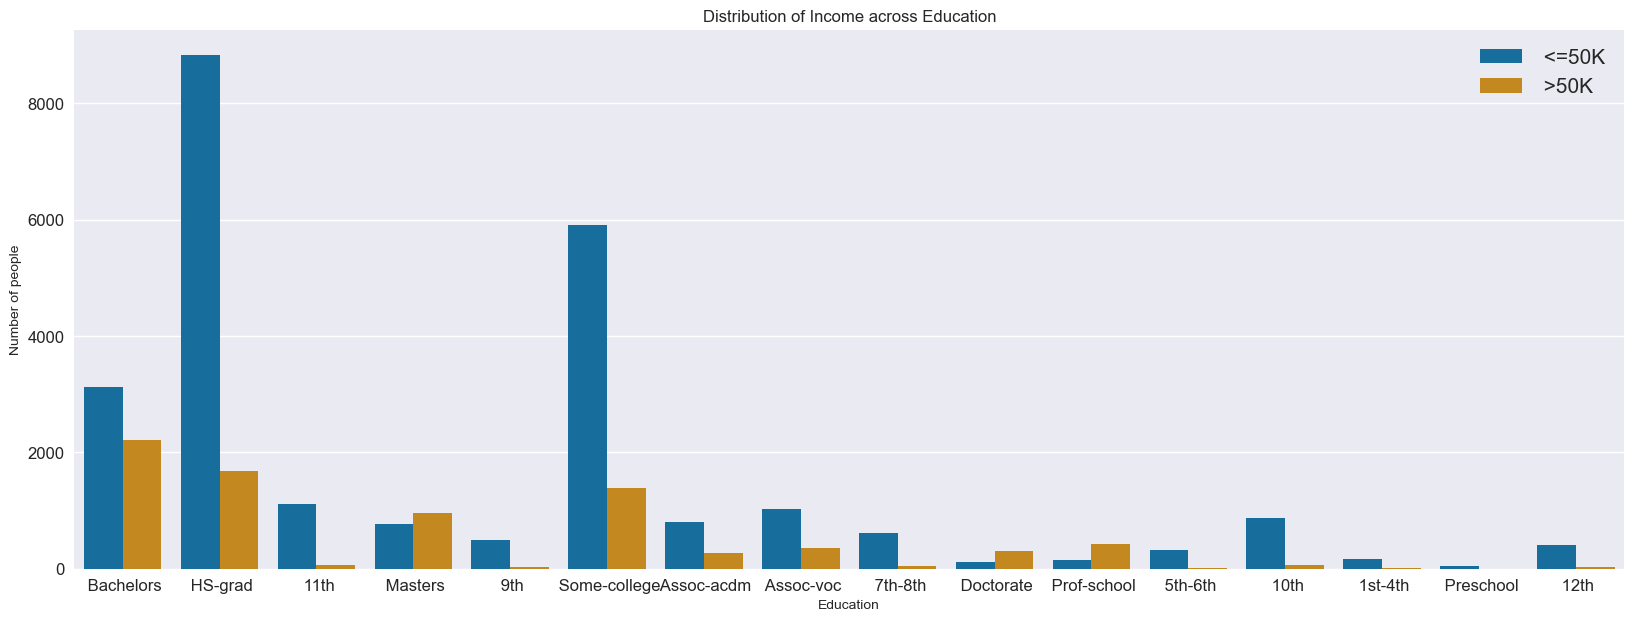

In [105]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['Education'],
              hue=df['Income'], palette='colorblind')
plt.title('Distribution of Income across Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

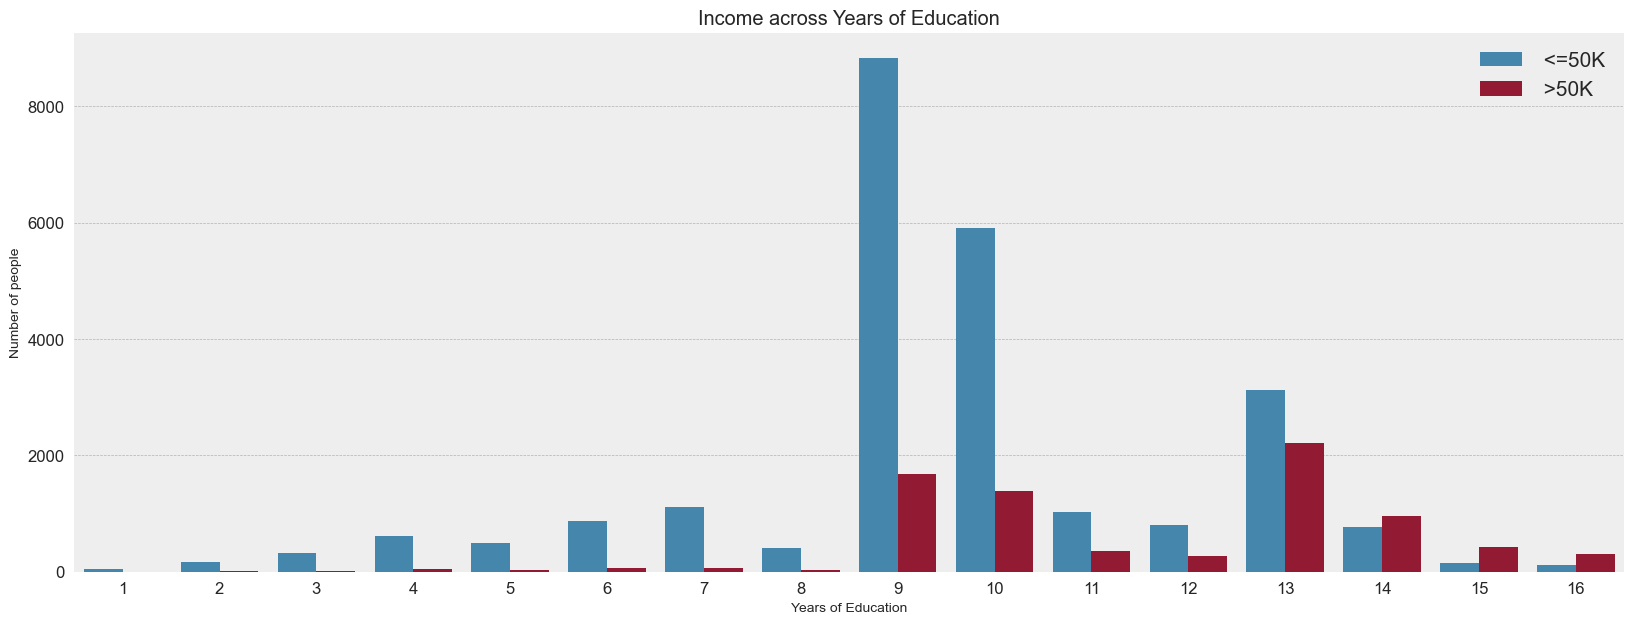

In [107]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['Education_num'],
              hue=df['Income'])
plt.title('Income across Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

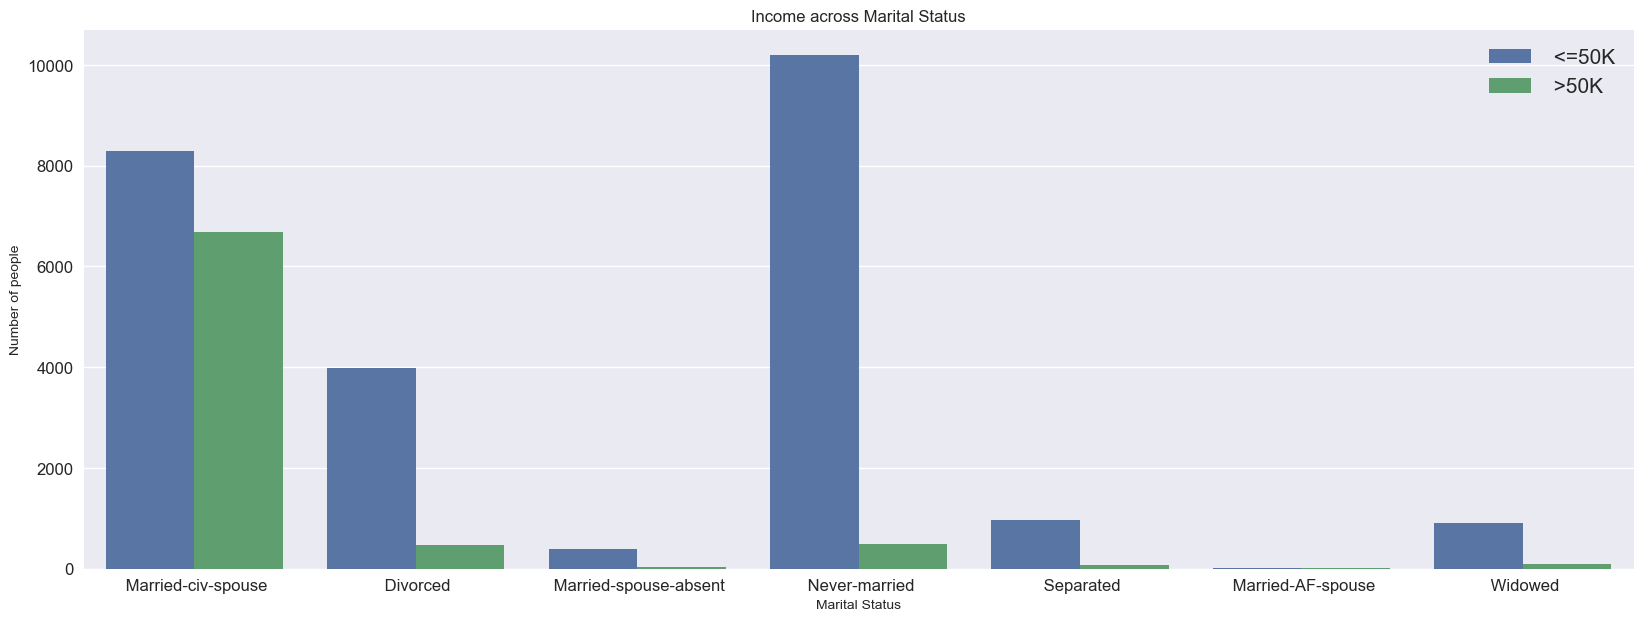

In [109]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['Marital_status'], hue=df['Income'])
plt.title('Income across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

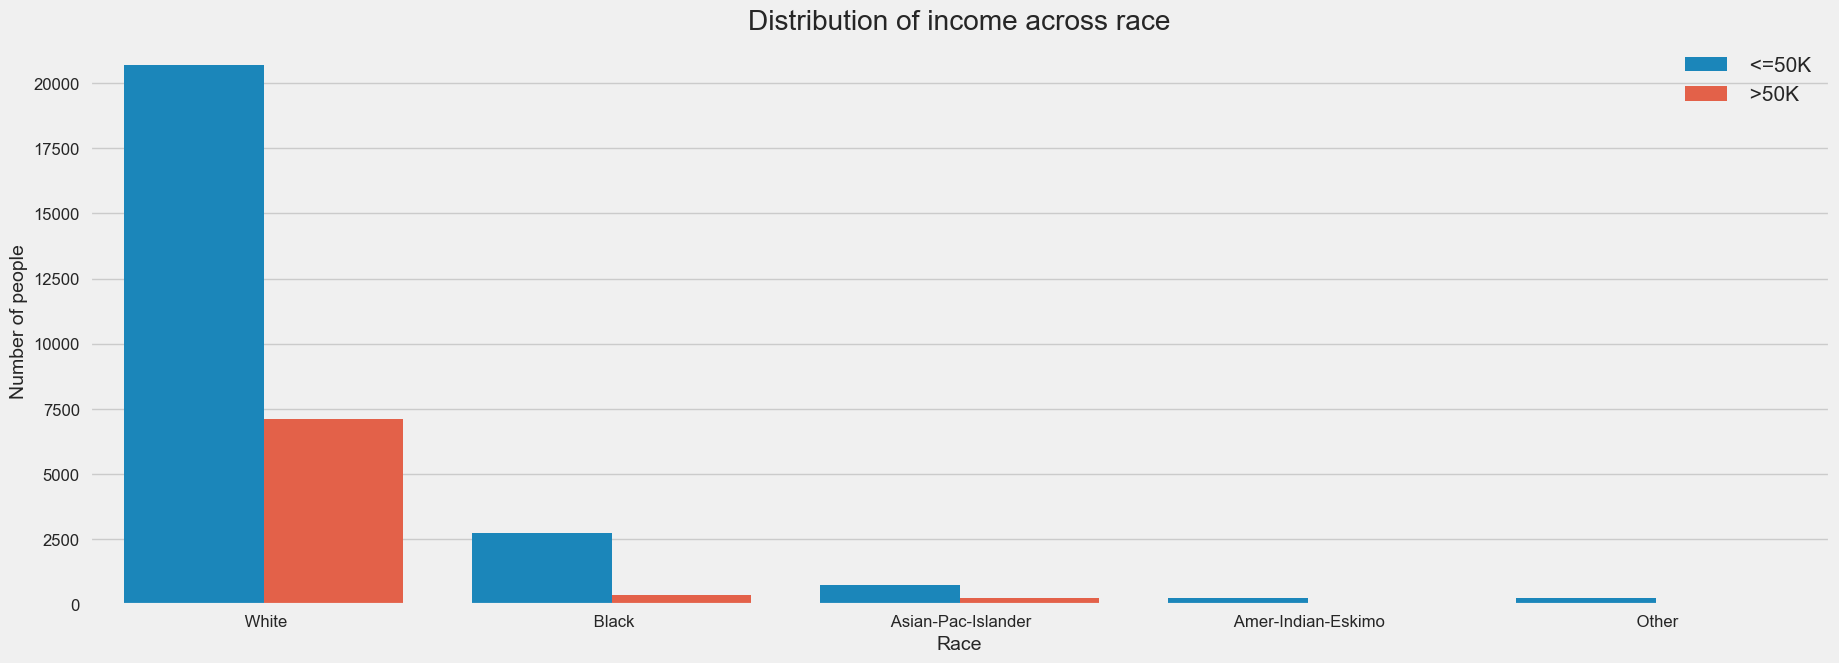

In [110]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['Race'], hue=df['Income'])
plt.title('Distribution of income across race')
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

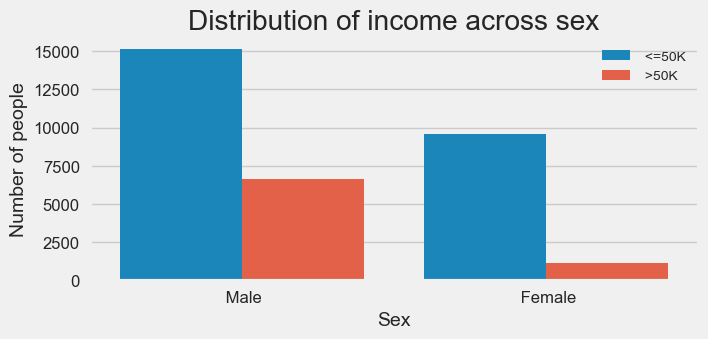

In [111]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(x=df['Sex'], hue=df['Income'])
plt.title('Distribution of income across sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

# Multivariate Analysis

In [112]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [113]:
df['Income']=le.fit_transform(df['Income'])

In [116]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


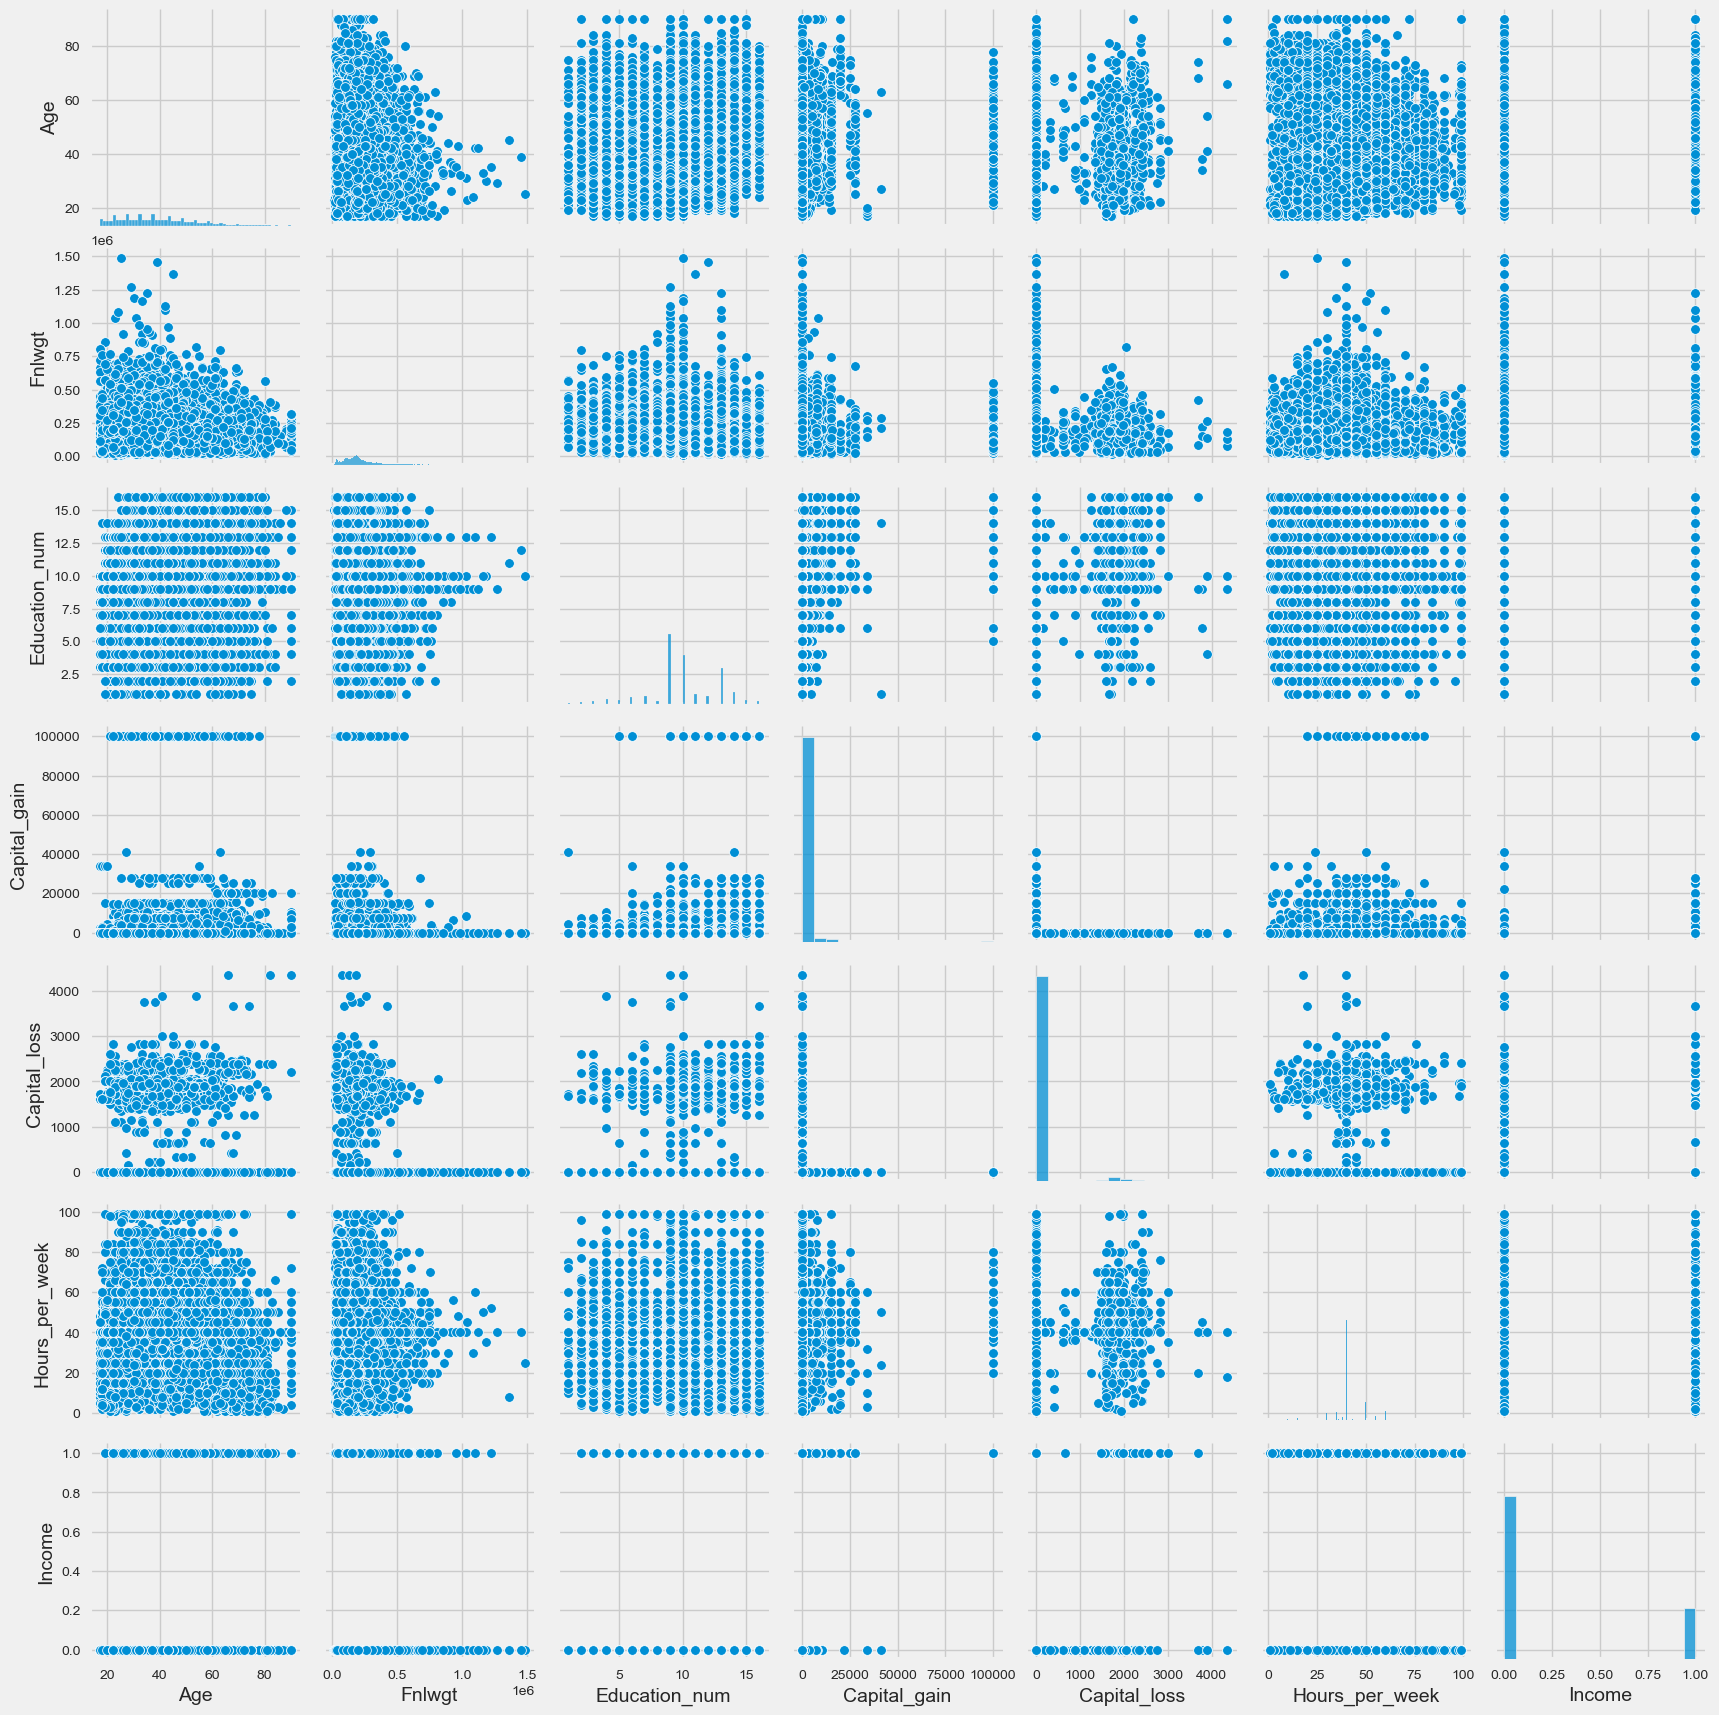

In [118]:
# Creating a Pairplot of Dataset
sns.pairplot(df)
plt.show()

# Label Encoding

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
for col in df.columns:
    if df[col].dtypes=='object':
        encoder=LabelEncoder()
        df[col]=encoder.fit_transform(df[col])

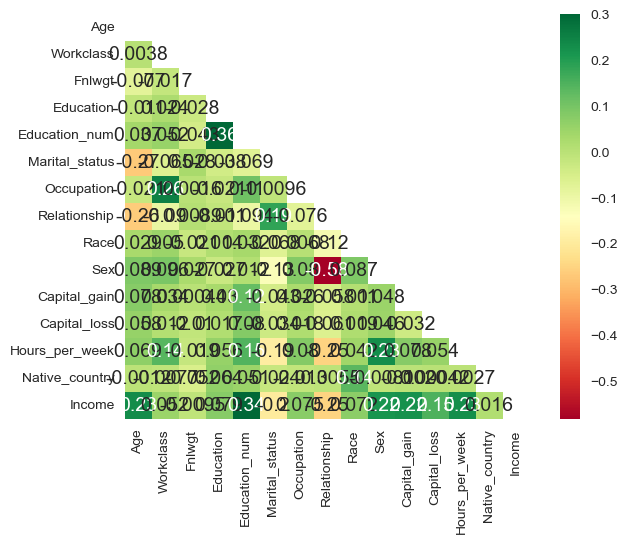

In [130]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

# Observations:
* in this dataset, the most number of people are young, white, male, high school, graduates with 9 to 10 years of education and work 40 hours per week.
* From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week

# Feature Selection 

In [131]:
x=df.drop('Income',axis=1)
y=df['Income']

In [132]:
print('Input Data',x.head())
print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
print('Output Data',y.head())

Input Data    Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          6   83311          9             13               2   
1   38          4  215646         11              9               0   
2   53          4  234721          1              7               2   
3   28          4  338409          9             13               2   
4   37          4  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           4             0     4    1             0             0   
1           6             1     4    1             0             0   
2           6             0     2    1             0             0   
3          10             5     2    0             0             0   
4           4             5     4    0             0             0   

   Hours_per_week  Native_country  
0              13              39  
1              40              39  
2              40              39

# Extra Trees Classifier

In [134]:
from sklearn.ensemble import ExtraTreesClassifier
selector=ExtraTreesClassifier(random_state=42)

In [135]:
selector.fit(x,y)

ExtraTreesClassifier(random_state=42)

In [138]:
feature_imp=selector.feature_importances_

In [139]:
for index, val in enumerate(feature_imp):
    print(index,round(val*100),2)

0 15 2
1 4 2
2 17 2
3 4 2
4 9 2
5 7 2
6 7 2
7 9 2
8 1 2
9 3 2
10 9 2
11 3 2
12 9 2
13 2 2


In [141]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [142]:
x=x.drop(['Workclass','Education','Race','Sex','Capital_loss','Native_country'],axis=1)

# Feature Scaling

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
for col in x.columns:
    scaler=StandardScaler()
    x[col]=scaler.fit_transform(x[col].values.reshape(-1,1))

# fixing Imbalanced Dataset using Oversampling 

In [145]:
round(y.value_counts(normalize=True)*100,2).astype('str')+' %'

Income
0    75.92 %
1    24.08 %
Name: proportion, dtype: object

In [147]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)

In [148]:
ros.fit(x,y)

RandomOverSampler(random_state=42)

In [149]:
x_resampled, y_resampled=ros.fit_resample(x,y)

In [151]:
round(y_resampled.value_counts(normalize=True)*100,2).astype('str')+ ' %'

Income
0    50.0 %
1    50.0 %
Name: proportion, dtype: object

# Creating a Train Test split

In [153]:
from sklearn.model_selection import train_test_split, cross_val_score

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [156]:
print('X_train sahpe',x_train.shape)
print('x_test shpae',x_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train sahpe (39550, 8)
x_test shpae (9888, 8)
y_train shape (39550,)
y_test shape (9888,)


# Data Modeling
# Logistic Regression 

In [159]:
from sklearn.linear_model import  LogisticRegression 
log_reg=LogisticRegression()

In [160]:
log_reg

LogisticRegression()

In [161]:
log_reg=LogisticRegression(random_state=42)

In [162]:
log_reg

LogisticRegression(random_state=42)

In [163]:
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [164]:
y_pred_log_reg=log_reg.predict(x_test)

# KNN Classifier

In [167]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [168]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [169]:
y_pred_knn=knn.predict(x_test)

# Support Vector Classifier

In [172]:
from sklearn.svm import SVC

In [173]:
svc=SVC(random_state=42)

In [174]:
svc.fit(x_train,y_train)

SVC(random_state=42)

In [175]:
y_pred_svc=svc.predict(x_test)

# Naive Bayes Classifier

In [177]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [178]:
nb.fit(x_train,y_train)

GaussianNB()

In [179]:
y_pred_nb=nb.predict(x_test)

# Decision Tree Calssifer

In [181]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier(random_state=42)

In [182]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [183]:
y_pred_dec_tree=dec_tree.predict(x_test)

# Random Forest Calssifier

In [186]:
from sklearn.ensemble import RandomForestClassifier
ran_for=RandomForestClassifier(random_state=42)

In [187]:
ran_for.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [188]:
y_pred_ran_for=ran_for.predict(x_test)

# XGB Classifier

In [189]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [190]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [191]:
y_pred_xgb=xgb.predict(x_test)

# Model Evaluation 

In [192]:
from sklearn.metrics import accuracy_score,f1_score

In [195]:
print('Logistc Regression ')
print('Accuracy Score: ',round(accuracy_score(y_test,y_pred_log_reg)*100,2))
print('F1 score: ', round(f1_score(y_test,y_pred_log_reg)*100,2))

Logistc Regression 
Accuracy Score:  76.05
F1 score:  76.07


In [197]:
print('KNN Classifier : ')
print('Accuracy Score : ', round(accuracy_score(y_test,y_pred_knn)* 100, 2))
print('F1 score : ',round(f1_score(y_test,y_pred_knn)*100, 2))

KNN Classifier : 
Accuracy Score :  83.61
F1 score :  84.63


In [198]:
print(' Suport Vector Classifier : ')
print('Accuracy Score : ', round(accuracy_score(y_test,y_pred_svc)*100 ,2))
print('F1 Score : ',round(f1_score(y_test,y_pred_svc)*100,2))

 Suport Vector Classifier : 
Accuracy Score :  81.99
F1 Score :  83.09


In [202]:
print('Naive Bayes Classifer : ')
print('Accuracy Score : ',round(accuracy_score(y_test,y_pred_nb)*100,2))
print('F1 Score : ', round(f1_score(y_test,y_pred_nb)*100,2))

Naive Bayes Classifer : 
Accuracy Score :  66.26
F1 Score :  52.03


In [203]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.28
F1 score: 91.75


In [204]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.57
F1 score: 92.93


In [205]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 86.15
F1 score: 86.73


#  Hyperparameter Tuning

In [206]:
from sklearn.model_selection import RandomizedSearchCV

In [207]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [208]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [209]:
rf_tuned = RandomForestClassifier(random_state=42)

In [210]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [212]:
rf_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [213]:
rf_cv.best_score_

0.9123135271807838

In [214]:
rf_cv.best_params_

{'n_estimators': 134, 'max_depth': 142}

In [215]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [217]:
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [218]:
y_pred_rf_best = rf_best.predict(x_test)

In [219]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.59
F1 score: 92.95


In [220]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf_best)

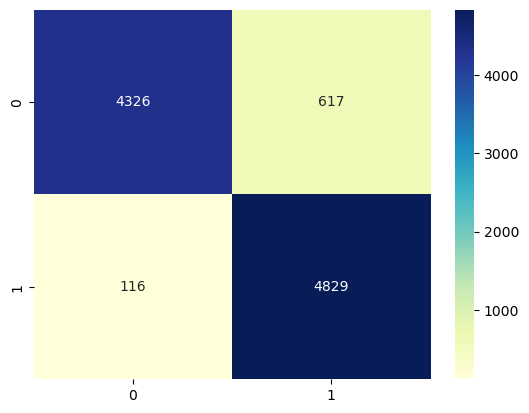

In [221]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4943
           1       0.89      0.98      0.93      4945

    accuracy                           0.93      9888
   macro avg       0.93      0.93      0.93      9888
weighted avg       0.93      0.93      0.93      9888



# Conclusion:
In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.

A hyperparameter tuned random forest classifier gives the highest accuracy score of 92.59 and f1 score of 92.95

# Future work:
We have a large enough dataset, so we can use neural networks such as an artificial neural network to build a model which can result in better performance.

Thanks:
   * Navin Singh